In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../../data/togo-dapaong_qc.csv')
df.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
200629,2022-03-13 07:50,277.7,181.0,195.5,259.8,236.0,30.9,52.5,1.3,2.1,0.6,205.7,14.3,975,0,0.0,41.6,44.3,NaN
458320,2022-09-08 06:41,74.1,1.6,67.3,64.5,63.1,22.8,95.1,1.3,2.4,0.8,255.8,7.8,977,0,0.0,26.4,25.8,NaN
307433,2022-05-26 11:54,1050.0,606.1,433.6,985.6,948.0,30.9,64.9,0.4,1.6,0.6,260.6,12.2,980,0,0.0,56.3,63.1,NaN
429210,2022-08-19 01:31,-0.8,0.0,0.0,0.0,0.0,26.3,84.3,0.8,1.4,0.5,227.0,5.5,976,0,0.0,26.3,26.0,NaN
335426,2022-06-14 22:27,-1.8,0.0,0.0,0.0,0.0,26.3,84.8,2.3,3.4,0.6,237.3,12.0,975,0,0.0,25.8,25.4,NaN
481190,2022-09-24 03:51,-1.1,0.0,0.0,0.0,0.0,22.8,98.0,1.9,2.1,0.2,214.4,1.0,976,0,0.0,22.7,22.3,NaN
509116,2022-10-13 13:17,727.9,358.8,382.9,737.6,729.4,32.6,60.7,1.9,2.9,0.5,31.1,10.7,974,0,0.0,54.0,54.5,NaN
448817,2022-09-01 16:18,195.8,10.2,177.9,175.6,175.1,27.8,74.7,3.2,4.4,0.6,226.3,15.1,975,0,0.0,34.3,33.9,NaN
261234,2022-04-24 09:55,828.0,565.7,313.0,760.8,745.3,33.7,51.4,3.2,4.6,0.6,269.8,14.2,975,0,0.0,54.2,65.2,NaN
218888,2022-03-26 00:09,-1.8,0.0,0.0,0.0,0.0,29.6,55.1,3.3,4.1,0.5,310.5,9.3,974,0,0.0,29.4,29.1,NaN


In [3]:
df.describe(include='number')

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
# Check for missing values
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# List columns with more than 5% missing values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("Columns with more than 5% missing values:")
print(columns_with_nulls)

# Drop columns with na values
df = df.dropna(subset=['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']).copy()
df = df.reindex().copy()

# remove incorrect entries for GHI, the possible values for Global Horizontal Irradiance (GHI) are between 0 and 1000 W/m²
df = df[(df['GHI'] >= 0) & (df['GHI'] <= 1000)].copy()
# remove incorrect entries for DNI, the possible values for Direct Normal Irradiance (DNI) are between 0 and 1000 W/m²
df = df[(df['DNI'] >= 0) & (df['DNI'] <= 1000)].copy()
# remove incorrect entries for DHI, the possible values for Diffuse Horizontal Irradiance (DHI) are between 0 and 1000 W/m²
df = df[(df['DHI'] >= 0) & (df['DHI'] <= 1000)].copy()


Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [6]:
df.shape

(262403, 19)

In [7]:
# Compute Z-scores for GHI, DNI, and DHI, 'ModA', 'ModB', 'WS', and 'WSgust'
z_scores = zscore(df[['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']])
# Create a DataFrame for Z-scores to align indices
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], index=df.index)

# Identify outliers using Z-scores
# A Z-score greater than 3 or less than -3 is typically considered an outlier
# Filter the DataFrame to get the outliers
outliers = df[np.abs(z_scores_df) > 3].any(axis=1)

# Display the outliers
print("Outliers based on Z-scores:")
outliers

Outliers based on Z-scores:


342       False
343       False
344       False
345       False
346       False
          ...  
525584    False
525585    False
525586    False
525587    False
525588    False
Length: 262403, dtype: bool

In [8]:
# Drop rows with outliers
df_cleaned = df.loc[~outliers].reset_index(drop=True).copy()
df_cleaned.shape

(260729, 19)

In [9]:
# Exporting the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../../data/togo-cleaned.csv', index=False)

In [10]:
# Convert the 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp', inplace=True)

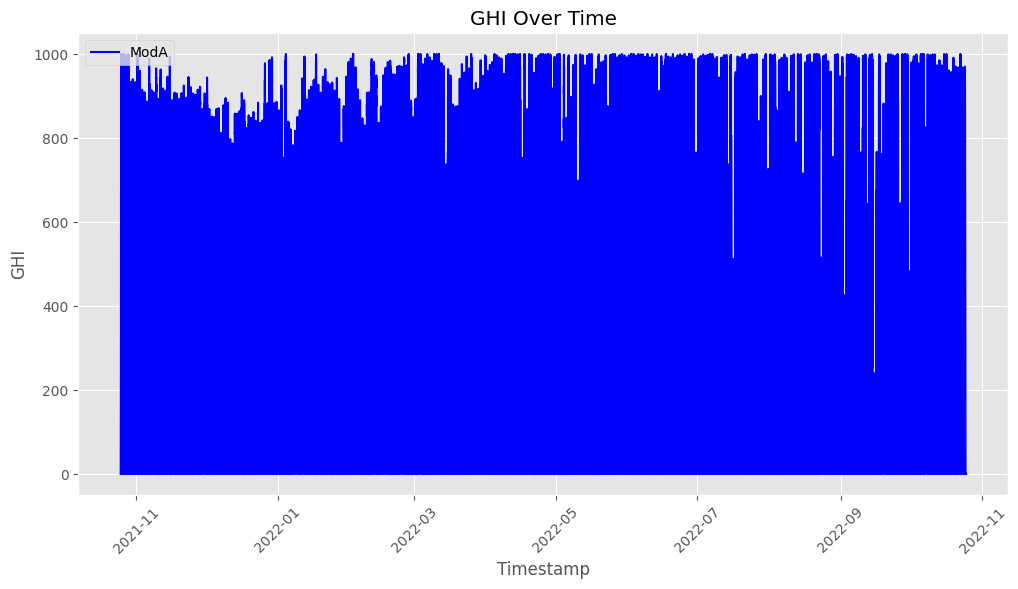

In [11]:

# Plot GHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['GHI'], label='ModA', color='blue')
plt.title("GHI Over Time")
plt.xticks(rotation=45)
plt.show()

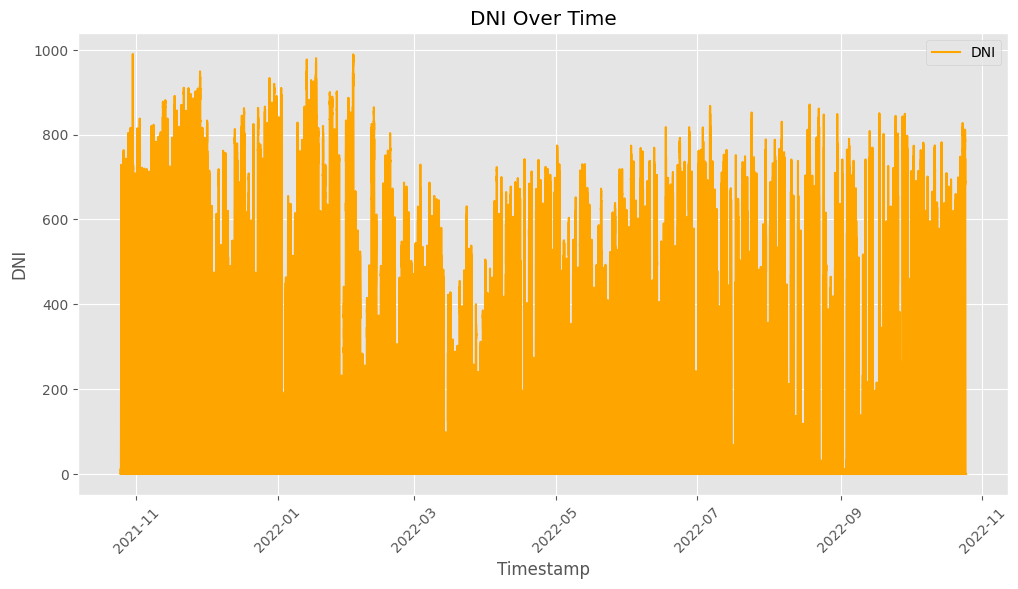

In [12]:
# Plot DNI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DNI'], label='DNI', color='orange')
plt.title("DNI Over Time")
plt.xticks(rotation=45)
plt.show()

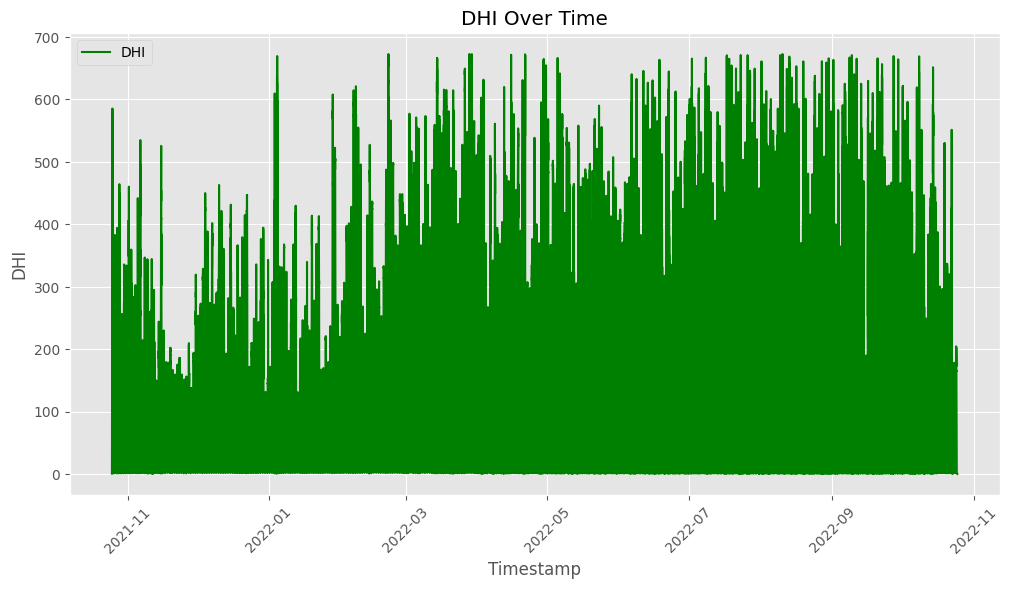

In [13]:
# Plot DHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DHI'], label='DHI', color='green')
plt.title("DHI Over Time")
plt.xticks(rotation=45)
plt.show()

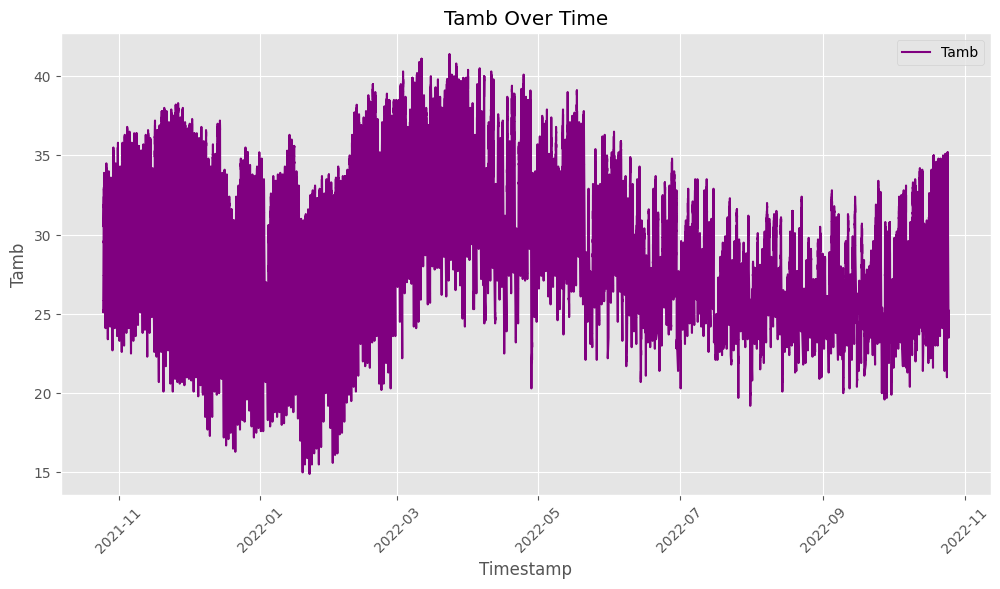

In [14]:
# Plot Tamb  over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Tamb'], label='Tamb', color='purple')
plt.title("Tamb Over Time")
plt.xticks(rotation=45)
plt.show()

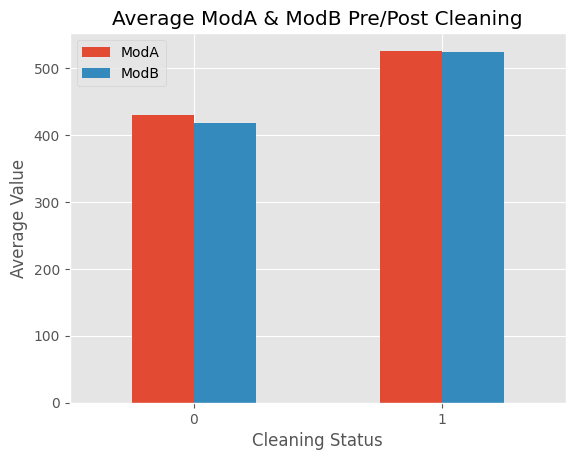

In [15]:
# Group by 'Cleaning' and calculate the mean of ModA and ModB
mod_means = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot the averages
mod_means.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.show()

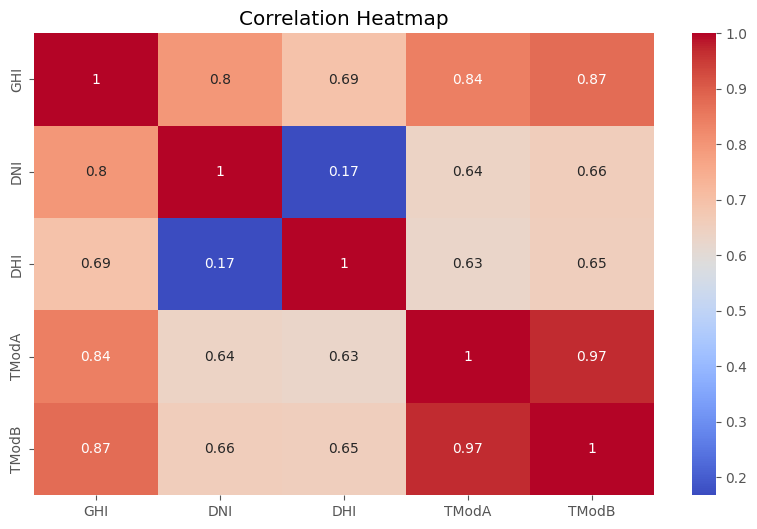

In [16]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

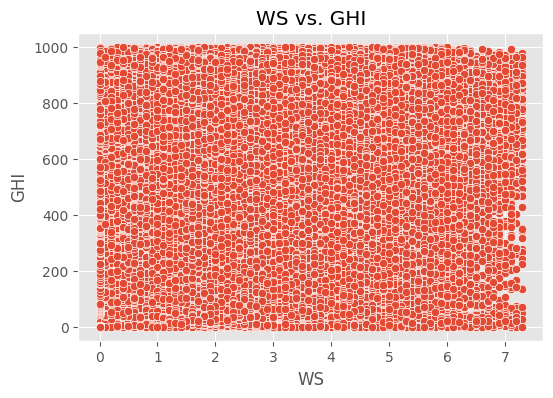

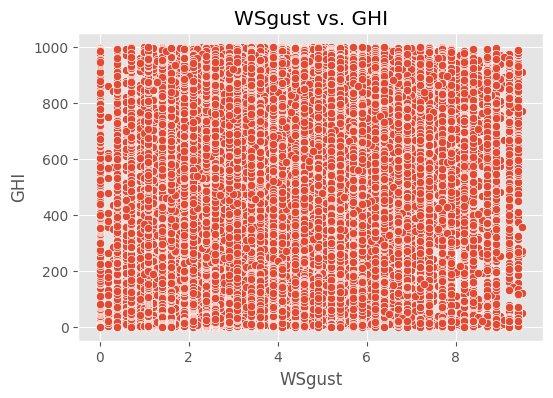

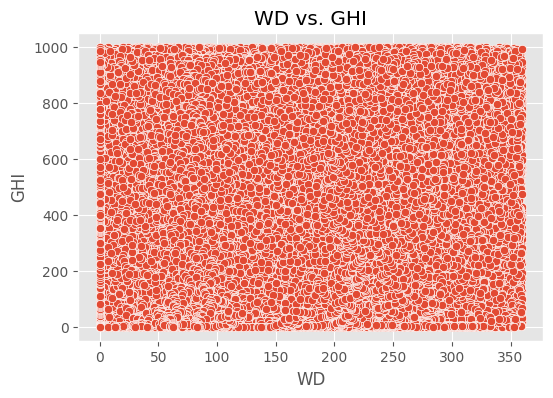

In [17]:
# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WS'], y=df_cleaned['GHI'])
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WSgust'], y=df_cleaned['GHI'])
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WD'], y=df_cleaned['GHI'])
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.show()


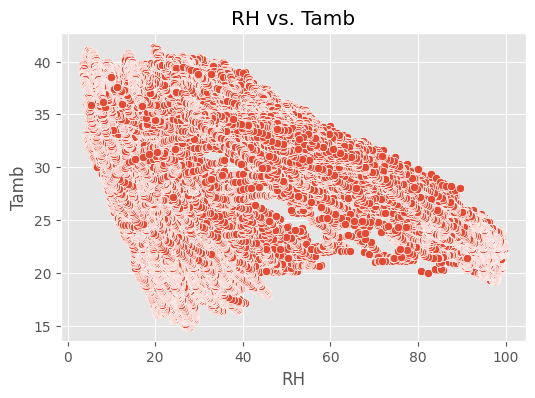

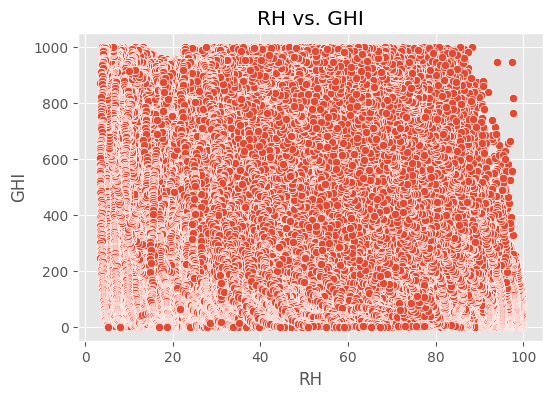

In [18]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['Tamb'])
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['GHI'])
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.show()

In [19]:
# Calculate and print correlation coefficients
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

Correlation between RH and Tamb: -0.57
Correlation between RH and GHI: -0.35


<Figure size 800x800 with 0 Axes>

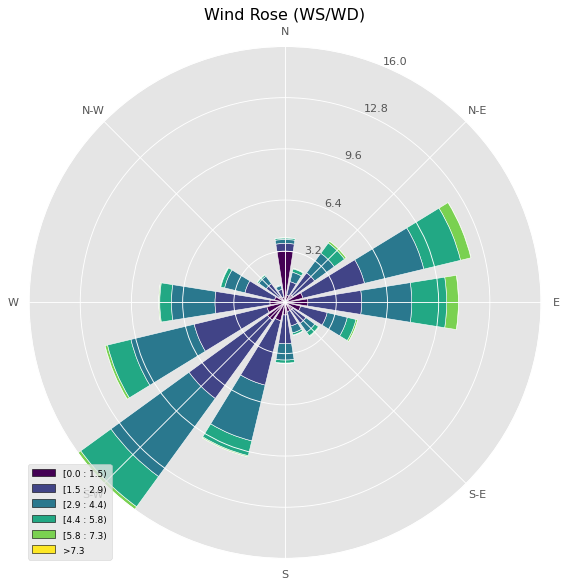

In [20]:
from windrose import WindroseAxes

# Wind rose plot for Wind Speed (WS) and Wind Direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS/WD)')
ax.set_legend()
plt.show()

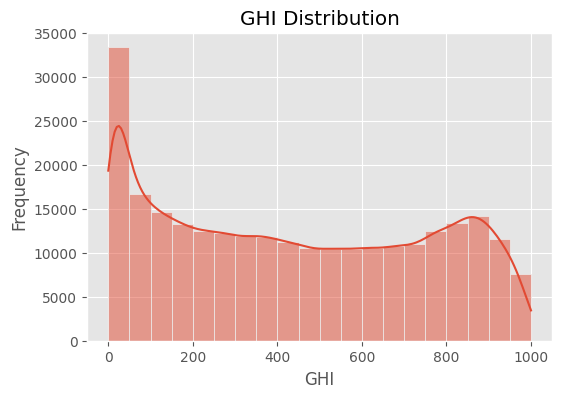

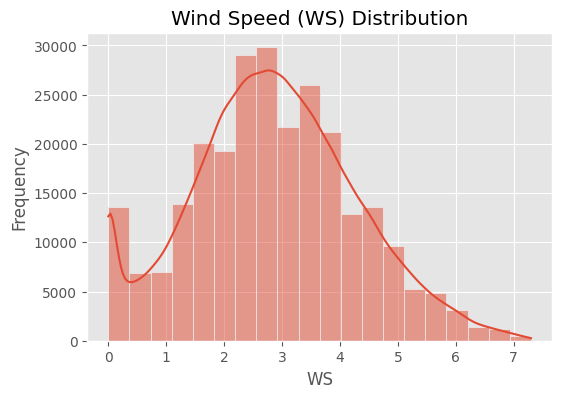

In [21]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['GHI'], bins=20, kde=True)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['WS'], bins=20, kde=True)
plt.title("Wind Speed (WS) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

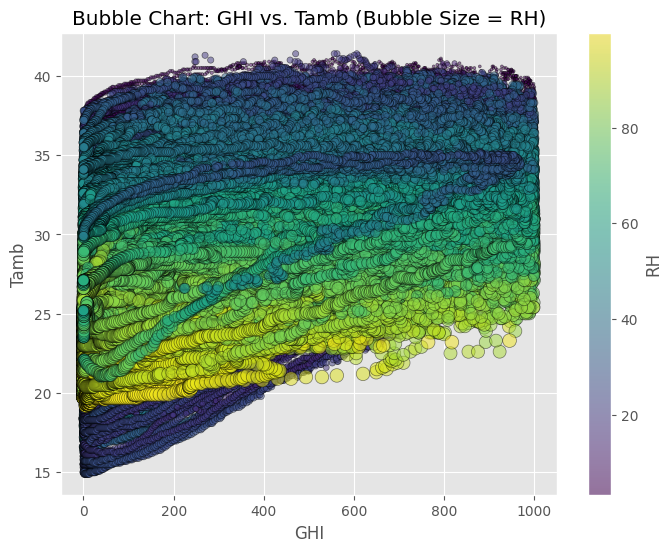

In [22]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['RH'],  # Bubble size
            alpha=0.5, c=df_cleaned['RH'], cmap='viridis', edgecolor='k')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH')
plt.show()